In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

In [2]:
cov1 = pd.read_csv('covid_19_data.csv')
cov1.fillna('Not Stated', inplace = True)
cov1

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


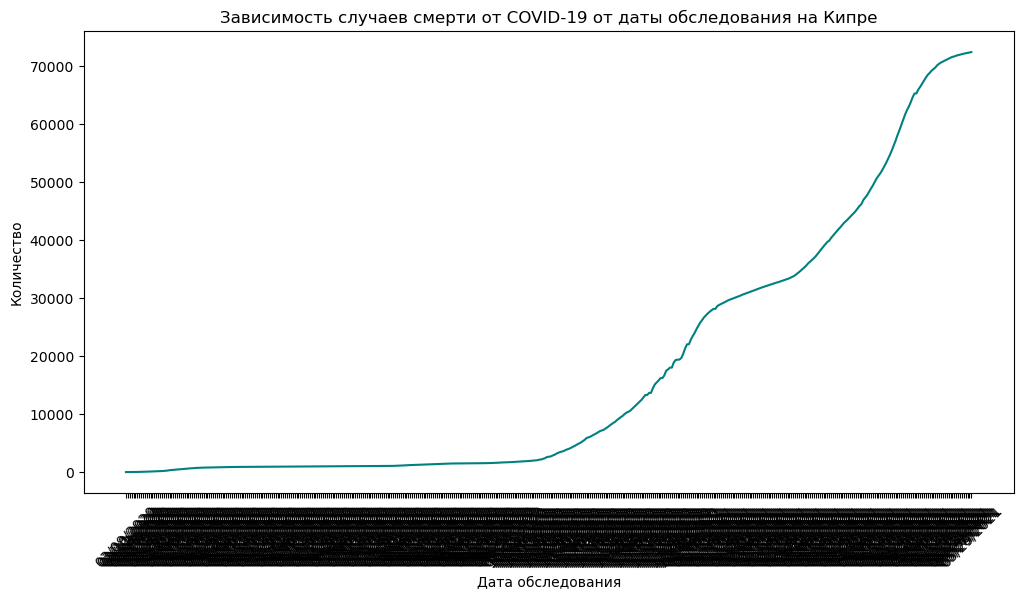

In [12]:
filtered_cov = cov1[(cov1['Country/Region'] == 'Cyprus')]
plt.figure(figsize=(12, 6))
plt.plot(filtered_cov['ObservationDate'], filtered_cov['Confirmed'], color='teal', label='Confirmed')
plt.title('Зависимость случаев смерти от COVID-19 от даты обследования на Кипре')
plt.xlabel('Дата обследования')
plt.ylabel('Количество')
plt.xticks(rotation=45) 
plt.show()

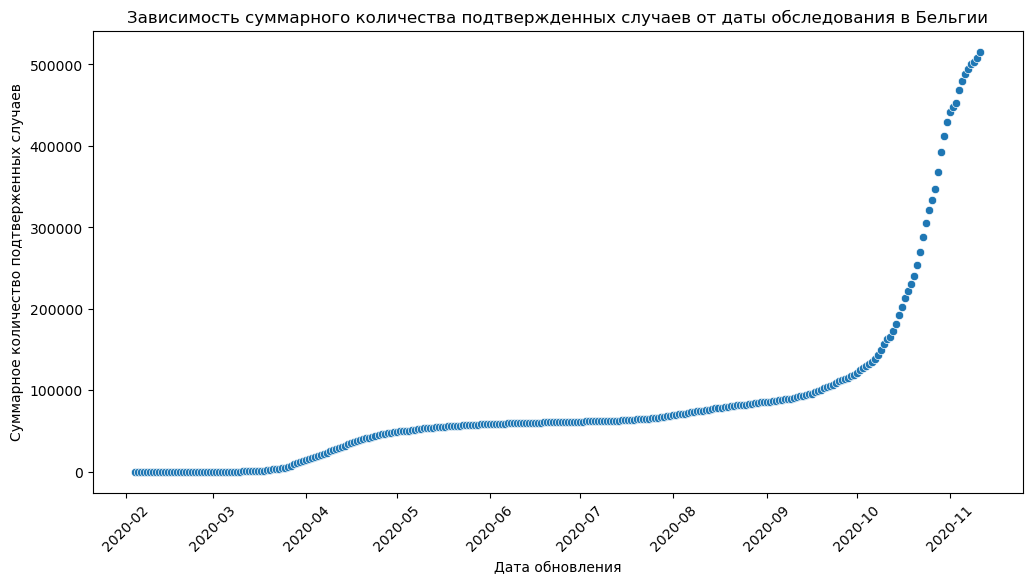

In [70]:
cov1['ObservationDate'] = pd.to_datetime(cov1['ObservationDate'])
bel_cov1 = cov1[(cov1['Country/Region'] == 'Belgium') & 
              ((cov1['Province/State'] == 'Not Stated') | (cov1['Province/State'] == 'Unknown')) & (cov1['ObservationDate'] <= '11/11/2020')]
summed_bel_cov1 = bel_cov1.groupby('ObservationDate')['Confirmed'].sum().reset_index()
plt.figure(figsize=(12, 6)) 
sns.scatterplot(data=summed_bel_cov1, x='ObservationDate', y='Confirmed')
plt.title('Зависимость суммарного количества подтвержденных случаев от даты обследования в Бельгии')
plt.xlabel('Дата обновления')
plt.ylabel('Суммарное количество подтверженных случаев')
plt.xticks(rotation=45)
plt.show()

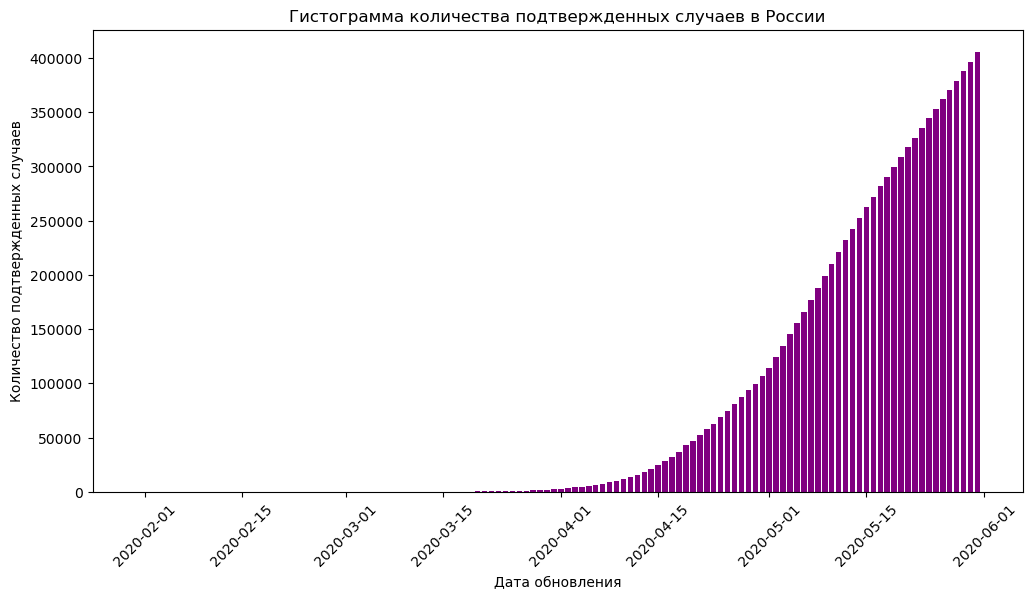

In [24]:
cov1['ObservationDate'] = pd.to_datetime(cov1['ObservationDate'])
r_cov1 = cov1[(cov1['Country/Region'] == 'Russia') & 
              ((cov1['Province/State'] == 'Not Stated') | (cov1['Province/State'] == 'Unknown'))]
plt.figure(figsize=(12, 6))
plt.bar(r_cov1['ObservationDate'], r_cov1['Confirmed'], color='purple')
plt.title('Гистограмма количества подтвержденных случаев в России')
plt.xlabel('Дата обследования')
plt.ylabel('Количество подтвержденных случаев')
plt.xticks(rotation=45)
plt.show()

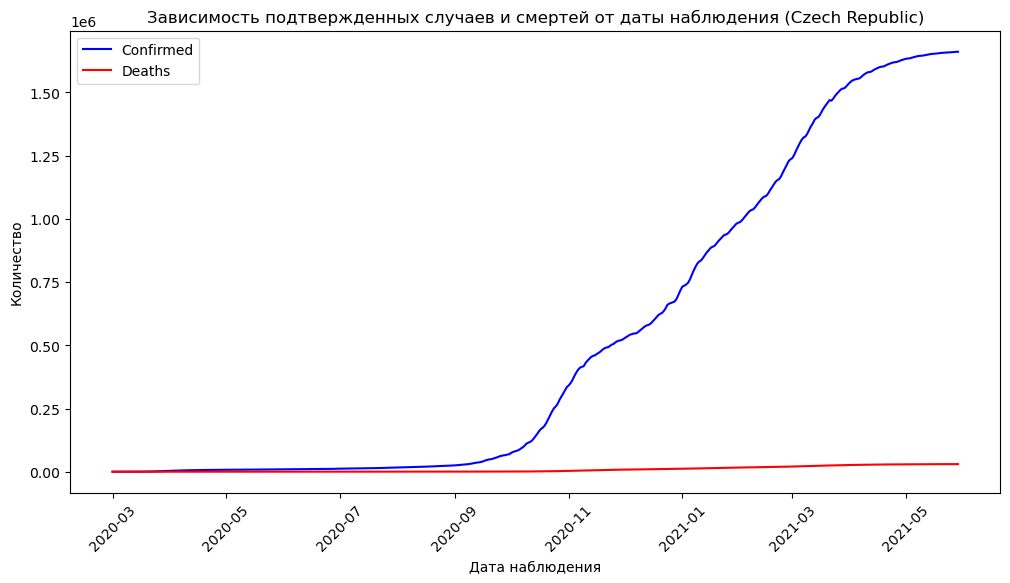

In [51]:
filtered_cov11 = cov1[(cov1['Country/Region'] == 'Czech Republic') & 
                   ((cov1['Province/State'] == 'Not Stated') | (cov1['Province/State'] == 'Unknown'))]

# Строю график зависимости 'ObservationDate' от 'Confirmed' и 'Deaths'
plt.figure(figsize=(12, 6))
plt.plot(filtered_cov11['ObservationDate'], filtered_cov11['Confirmed'], color='b', label='Confirmed')
plt.plot(filtered_cov11['ObservationDate'], filtered_cov11['Deaths'], color='r', label='Deaths')
plt.title('Зависимость подтвержденных случаев и смертей от даты обследования в Чехии')
plt.xlabel('Дата наблюдения')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.legend()  # Добавляем легенду для отображения соответствия линий данным
plt.show()

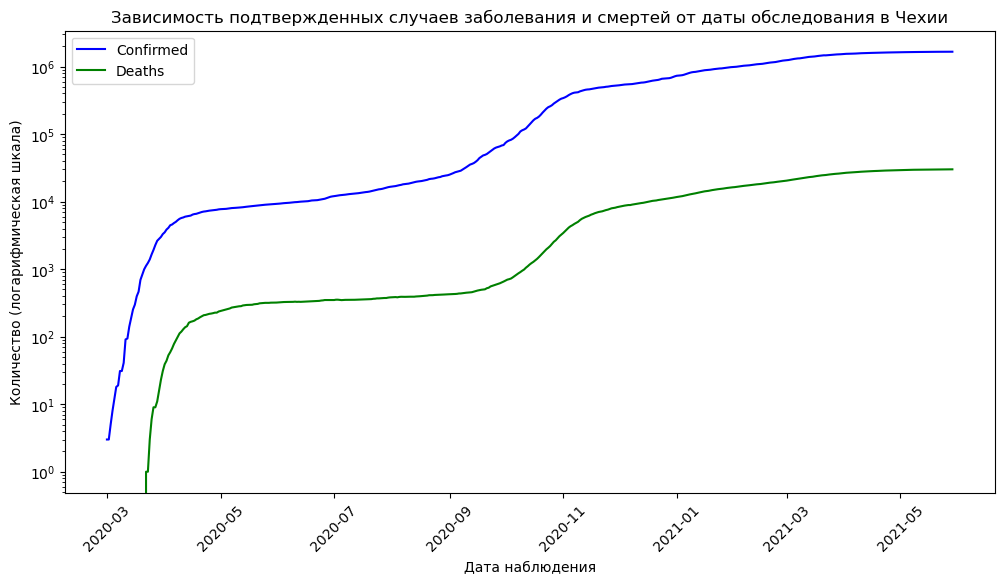

In [74]:
filter_cov1 = cov1[(cov1['Country/Region'] == 'Czech Republic') & 
                   ((cov1['Province/State'] == 'Not Stated') | (cov1['Province/State'] == 'Unknown'))]
plt.figure(figsize=(12, 6))
plt.plot(filter_cov1['ObservationDate'], filter_cov1['Confirmed'], color='b', label='Confirmed')
plt.plot(filter_cov1['ObservationDate'], filter_cov1['Deaths'], color='g', label='Deaths')
plt.yscale('log')  # Устанавливаю логарифмическую шкалу по оси y
plt.title('Зависимость подтвержденных случаев заболевания и смертей от даты обследования в Чехии')
plt.xlabel('Дата наблюдения')
plt.ylabel('Количество (логарифмическая шкала)')
plt.xticks(rotation=45)
plt.legend()  # Добавляем легенду для отображения соответствия линий данным
plt.show()

C:\Users\aboro\AppData\Local\Temp\ipykernel_3400\3198043069.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 0].set_xticklabels(['Confirmed', 'Deaths', 'Recovered'])
C:\Users\aboro\AppData\Local\Temp\ipykernel_3400\3198043069.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 1].set_xticklabels(['Confirmed', 'Deaths', 'Recovered'])
C:\Users\aboro\AppData\Local\Temp\ipykernel_3400\3198043069.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 0].set_xticklabels(['Confirmed', 'Deaths', 'Recovered'])
C:\Users\aboro\AppData\Local\Temp\ipykernel_3400\3198043069.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 1].set_xticklabels(['Confirmed', 'Deaths', 'Recovered'])


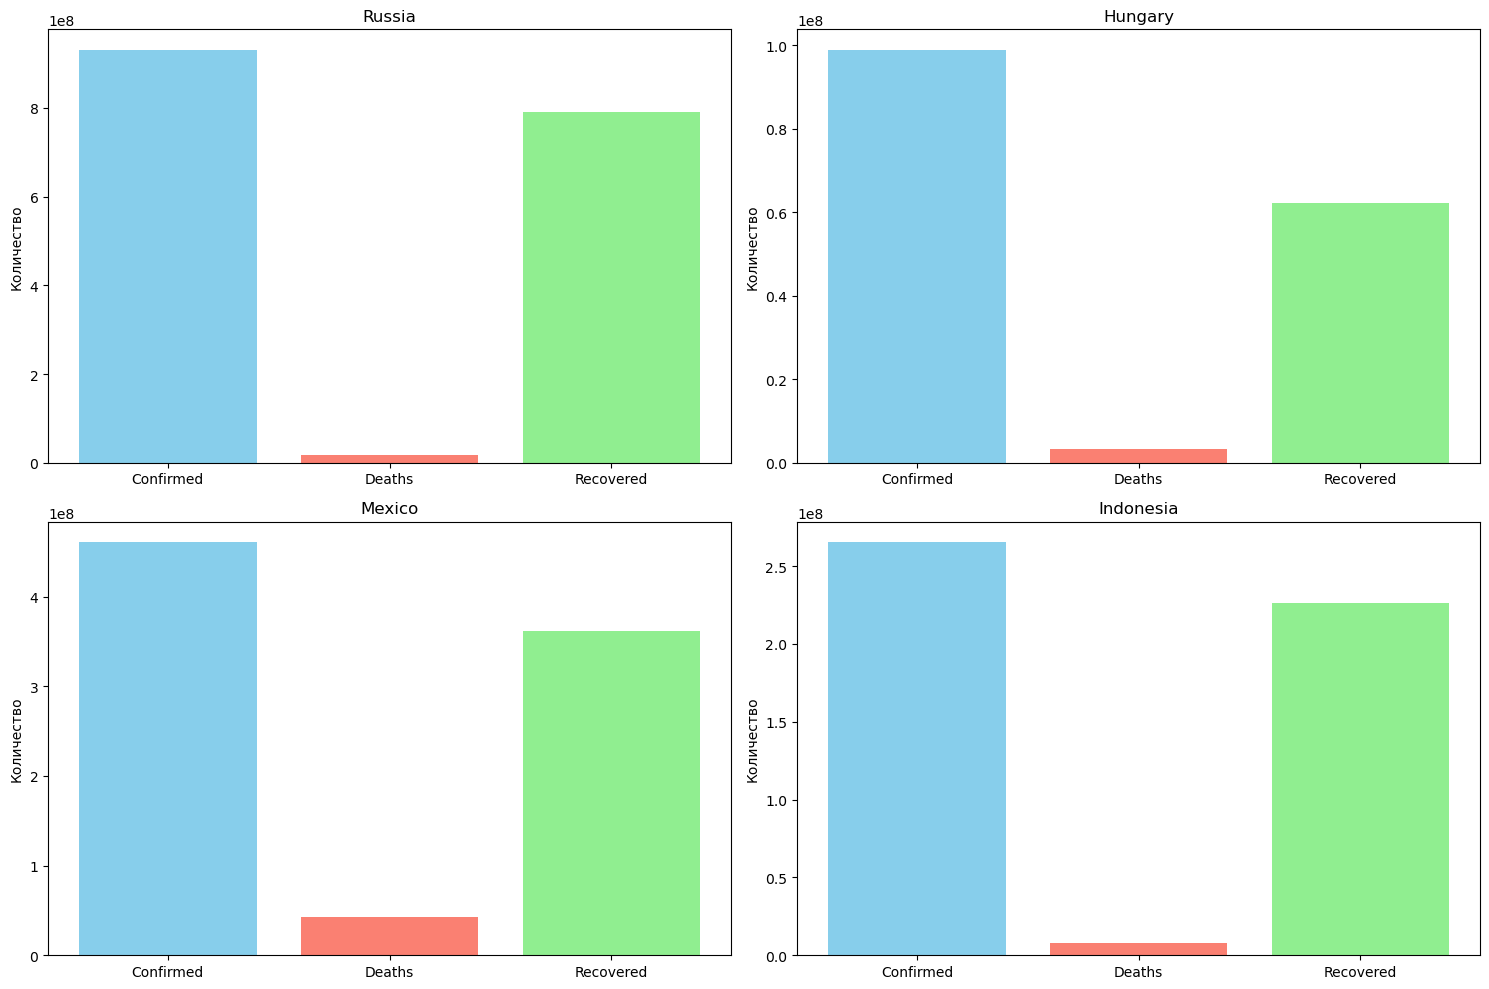

In [54]:
# Фильтрую данные для 'Russia', 'Hungary', 'Mexico' и 'Indonesia'
filtered_data = cov1[(cov1['Country/Region'].isin(['Russia', 'Hungary', 'Mexico', 'Indonesia']))]

# Группирую данные по странам и суммирую значения 'Confirmed', 'Deaths' и 'Recovered'
grouped_data = filtered_data.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# Строю 4 гистограммы для каждой страны, отображающие суммарное количество 'Confirmed', 'Deaths' и 'Recovered'
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Гистограмма для Russia
axes[0, 0].bar(grouped_data[grouped_data['Country/Region'] == 'Russia'].columns[1:], grouped_data[grouped_data['Country/Region'] == 'Russia'].iloc[0, 1:], color=['skyblue', 'salmon', 'lightgreen'])
axes[0, 0].set_title('Russia')
axes[0, 0].set_ylabel('Количество')
axes[0, 0].set_xticklabels(['Confirmed', 'Deaths', 'Recovered'])

# Гистограмма для Hungary
axes[0, 1].bar(grouped_data[grouped_data['Country/Region'] == 'Hungary'].columns[1:], grouped_data[grouped_data['Country/Region'] == 'Hungary'].iloc[0, 1:], color=['skyblue', 'salmon', 'lightgreen'])
axes[0, 1].set_title('Hungary')
axes[0, 1].set_ylabel('Количество')
axes[0, 1].set_xticklabels(['Confirmed', 'Deaths', 'Recovered'])

# Гистограмма для Mexico
axes[1, 0].bar(grouped_data[grouped_data['Country/Region'] == 'Mexico'].columns[1:], grouped_data[grouped_data['Country/Region'] == 'Mexico'].iloc[0, 1:], color=['skyblue', 'salmon', 'lightgreen'])
axes[1, 0].set_title('Mexico')
axes[1, 0].set_ylabel('Количество')
axes[1, 0].set_xticklabels(['Confirmed', 'Deaths', 'Recovered'])

# Гистограмма для Indonesia
axes[1, 1].bar(grouped_data[grouped_data['Country/Region'] == 'Indonesia'].columns[1:], grouped_data[grouped_data['Country/Region'] == 'Indonesia'].iloc[0, 1:], color=['skyblue', 'salmon', 'lightgreen'])
axes[1, 1].set_title('Indonesia')
axes[1, 1].set_ylabel('Количество')
axes[1, 1].set_xticklabels(['Confirmed', 'Deaths', 'Recovered'])

plt.tight_layout()
plt.show()

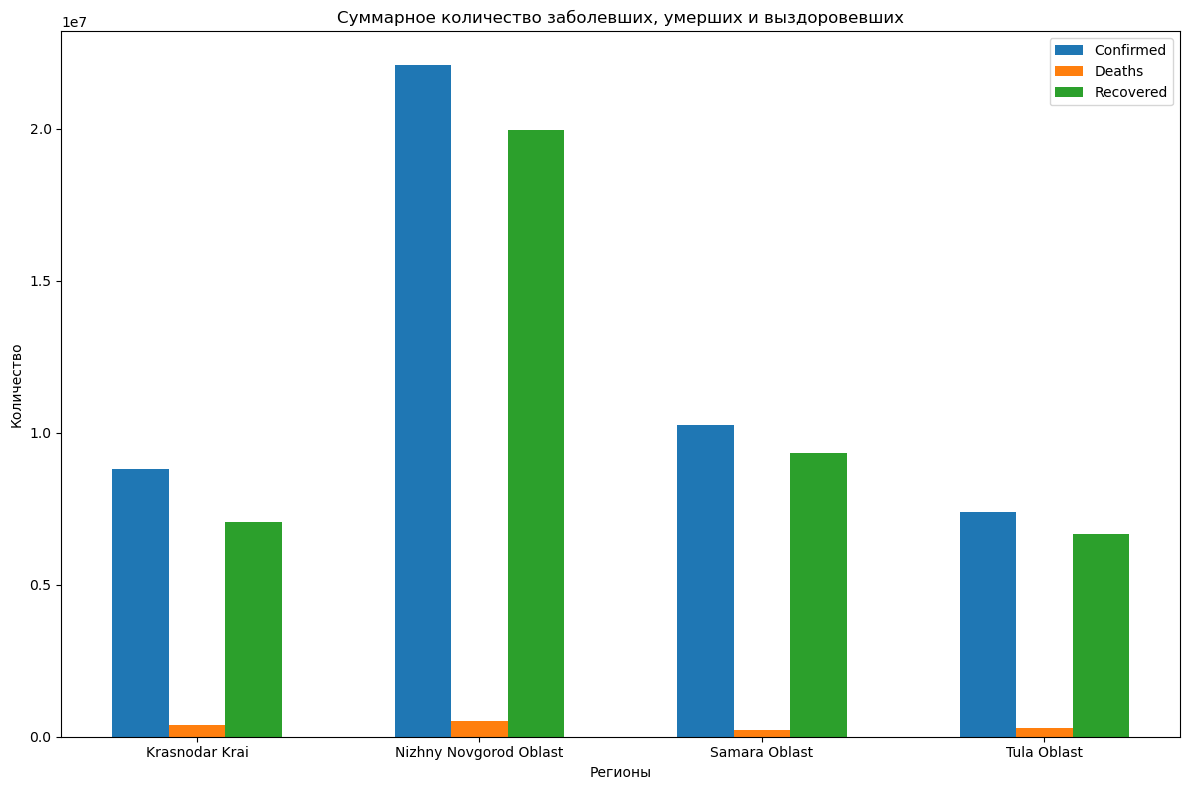

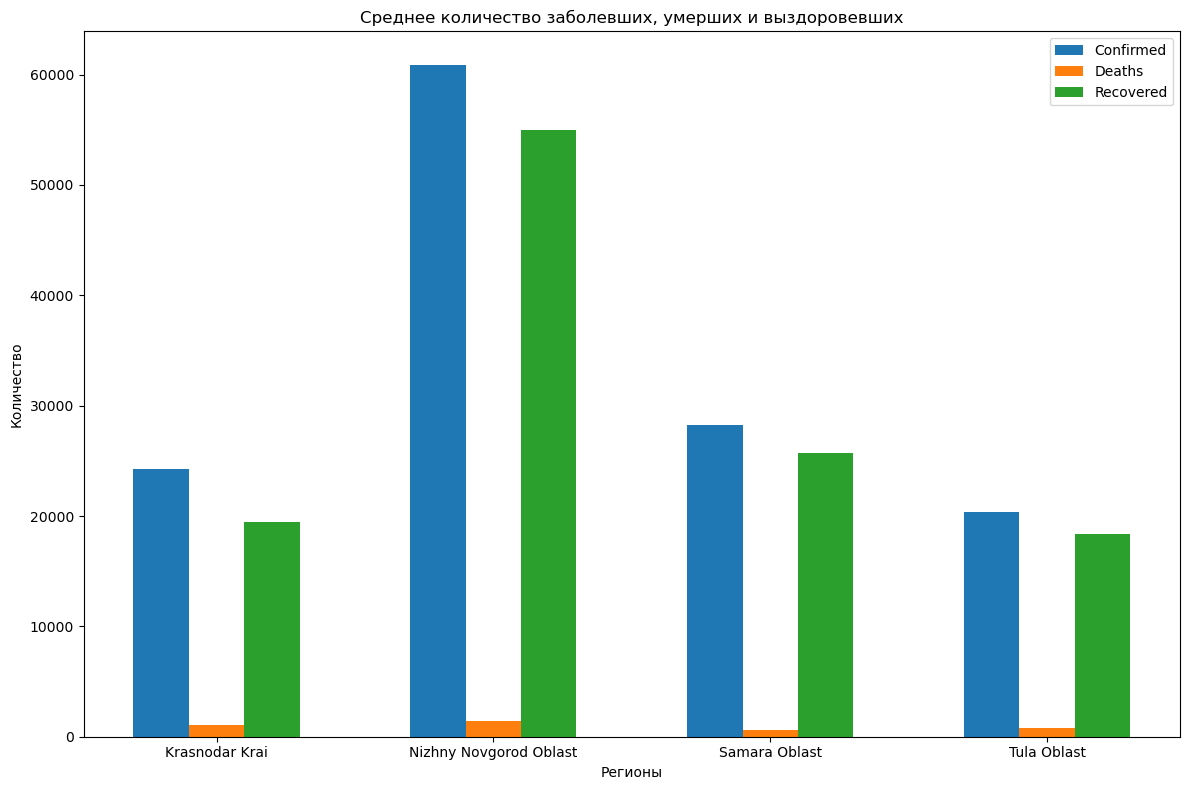

In [65]:
selected_regions = ['Samara Oblast', 'Tula Oblast', 'Krasnodar Krai', 'Nizhny Novgorod Oblast']
filtered_data = cov1[cov1['Province/State'].isin(selected_regions)]
grouped_data = filtered_data.groupby('Province/State')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
plt.figure(figsize=(12, 8))
bar_width = 0.2
plt.bar(grouped_data.index, grouped_data['Confirmed'], bar_width, label='Confirmed')
plt.bar(grouped_data.index + bar_width, grouped_data['Deaths'], bar_width, label='Deaths')
plt.bar(grouped_data.index + 2*bar_width, grouped_data['Recovered'], bar_width, label='Recovered')
plt.xlabel('Регионы')
plt.ylabel('Количество')
plt.title('Суммарное количество заболевших, умерших и выздоровевших')
plt.xticks(grouped_data.index + bar_width, grouped_data['Province/State'])
plt.legend()
plt.tight_layout()
plt.show()

grouped_data = filtered_data.groupby('Province/State')[['Confirmed', 'Deaths', 'Recovered']].mean().reset_index()
plt.figure(figsize=(12, 8))
bar_width = 0.2
plt.bar(grouped_data.index, grouped_data['Confirmed'], bar_width, label='Confirmed')
plt.bar(grouped_data.index + bar_width, grouped_data['Deaths'], bar_width, label='Deaths')
plt.bar(grouped_data.index + 2*bar_width, grouped_data['Recovered'], bar_width, label='Recovered')
plt.xlabel('Регионы')
plt.ylabel('Количество')
plt.title('Среднее количество заболевших, умерших и выздоровевших')
plt.xticks(grouped_data.index + bar_width, grouped_data['Province/State'])
plt.legend()
plt.tight_layout()
plt.show()

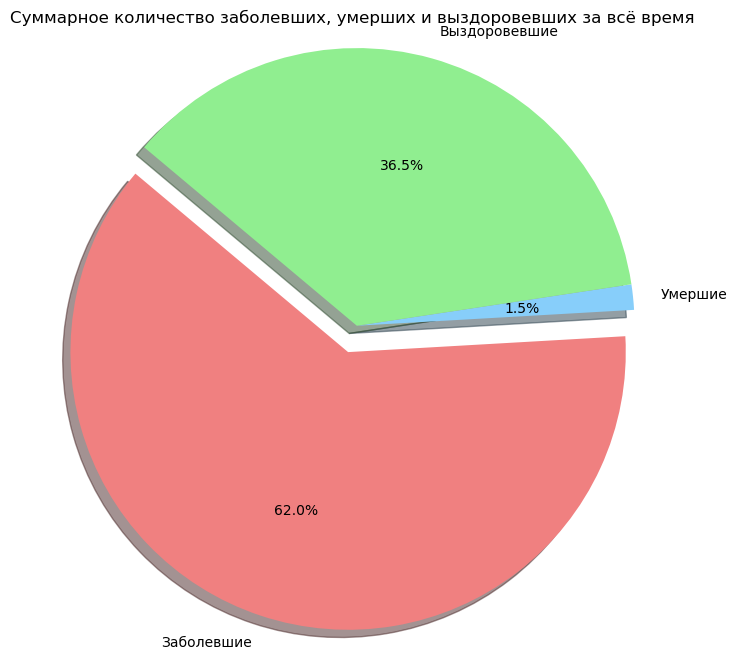

In [14]:
total_confirmed = cov1['Confirmed'].sum()
total_deaths = cov1['Deaths'].sum()
total_recovered = cov1['Recovered'].sum()

# Создаем диаграмму пирога
labels = ['Заболевшие', 'Умершие', 'Выздоровевшие']
sizes = [total_confirmed, total_deaths, total_recovered]
colors = ['lightcoral', 'lightskyblue', 'lightgreen']
explode = (0.1, 0, 0)  # "взрываем" сегмент суммарного количества заболевших

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Позволяет нарисовать диаграмму как круг, а не эллипс

plt.title('Суммарное количество заболевших, умерших и выздоровевших за всё время')
plt.show()